In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Fertilizer

In [2]:
# Step 1: Load the dataset
data_fertilizer = pd.read_csv("FAOSTAT_fertilizer_use_EU.csv",encoding="utf-8",sep=",",quotechar='"')
#Domain could be erase because it's always the same value ; In element we need to seprate agricultural use and use

#Rename the data inside Item
data_fertilizer.Item = data_fertilizer.Item.replace({
    'Nutrient nitrogen N (total)':"N",
    'Nutrient phosphate P2O5 (total)':"P2O5",
    'Nutrient potash K2O (total)':"K2O"
})

#Rename the data inside Element
data_fertilizer.Element = data_fertilizer.Element.replace({
    'Agricultural Use':"Agri_use (t)",
    'Use per area of cropland':"Use/cropland(kg/ha)"
})

#Drop useless columns
data_fertilizer.drop(columns=["Domain","Unit"],inplace=True)


# Step 2: Reshape the data using pivot
data_fertilizer = data_fertilizer.pivot(index=["Area", "Year"], columns=["Element",'Item'], values="Value").reset_index()#Element = Agricultural Use, Use per area of cropland 

# Step 3: Rename the columns
data_fertilizer.columns =data_fertilizer.columns = ['_'.join(filter(None, col)).strip() for col in data_fertilizer.columns]
data_fertilizer = data_fertilizer.rename(columns={"Area_": "Area", "Year_": "Year"})

# Display the first few rows of the reshaped dataframe
data_fertilizer.head()

,Area,Year,Agri_use (t)_N,Use/cropland(kg/ha)_N,Agri_use (t)_P2O5,Use/cropland(kg/ha)_P2O5,Agri_use (t)_K2O,Use/cropland(kg/ha)_K2O
0,Austria,1961,52300.0,26.84,100207.0,51.42,99000.0,50.80
1,Austria,1962,64239.0,33.11,115353.0,59.46,110593.0,57.01
2,Austria,1963,68254.0,35.69,125687.0,65.73,132063.0,69.06
3,Austria,1964,73380.0,38.31,126262.0,65.91,146830.0,76.65
4,Austria,1965,91292.0,47.55,131070.0,68.27,140918.0,73.39


# Wheat production

In [3]:
#Modifying the dataframe about wheat production in EU uses to put it in the right shape with only useful features
data_wheat_production = pd.read_csv('FAOSTAT_Wheat_production_EU.csv',delimiter=",")
data_wheat_production.drop(columns=["Unit","Domain","Area Code (M49)","Item","Year Code","Flag","Flag Description","Note","Domain Code","Item Code (CPC)","Element Code"],inplace=True)

data_wheat_production = data_wheat_production.pivot(index=["Area","Year"],columns=["Element"],values=["Value"]).reset_index()

data_wheat_production.columns =data_wheat_production.columns = ['_'.join(filter(None, col)).strip() for col in data_wheat_production.columns]


#Rename data
data_wheat_production = data_wheat_production.rename(columns={
                        "Value_Area harvested": "Area harvested (ha)",
                        "Value_Production": "Production (t)",
                        "Value_Yield": "Yield (kg/ha)", 
                        "Area_": "Area", 
                        "Year_": "Year"})

data_wheat_production


,Area,Year,Area harvested (ha),Production (t),Yield (kg/ha)
0,Austria,1961,275822.0,711673.0,2580.2
1,Austria,1962,270351.0,706206.0,2612.2
2,Austria,1963,274722.0,689528.0,2509.9
3,Austria,1964,282967.0,750534.0,2652.4
4,Austria,1965,275654.0,660712.0,2396.9
...,...,...,...,...,...
1438,Sweden,2019,469490.0,3476800.0,7405.5
1439,Sweden,2020,449170.0,3214300.0,7156.1
1440,Sweden,2021,479130.0,3027800.0,6319.4
1441,Sweden,2022,461570.0,3228700.0,6995.0


# Pesticides

## Read the data, change names and replace "0" with nan

In [4]:
data_pesticide=pd.read_csv("FAOSTAT_Pesticides_use_EU.csv.csv",encoding="utf-8",sep=",",quotechar='"')
data_pesticide = data_pesticide.pivot(index=["Area", "Year"], columns=["Element",'Item'], values="Value").reset_index()#Element = Agricultural Use, Use per area of cropland 

# Display the first few rows of the reshaped dataframe
data_pesticide.head()
data_pesticide.columns =data_pesticide.columns = ['_'.join(filter(None, col)).strip() for col in data_pesticide.columns]

data_pesticide.columns
#We rename the columns and also add the unit to not be lost in our data and units
data_pesticide = data_pesticide.rename(columns={"Agricultural Use_Insecticides – Pyrethroids":"Insecticides",
                        "Agricultural Use_Herbicides – Sulfonyl ureas":"Herbicides (t)",
                        "Agricultural Use_Fung & Bact – Triazoles, diazoles":"Fung & Bact (t)",
                        "Agricultural Use_Plant Growth Regulators":"Plant Growth Regulators (t)",})
data_pesticide.rename(columns={"Area_": "Area", "Year_": "Year"}, inplace=True)
data_pesticide = pd.merge(data_pesticide, data_wheat_production, on=["Area", "Year"], how='outer')
data_pesticide.replace(0, np.nan, inplace=True)
data_pesticide

,Area,Year,Insecticides,Herbicides (t),Fung & Bact (t),Plant Growth Regulators (t),Area harvested (ha),Production (t),Yield (kg/ha)
0,Austria,1961,NaN,NaN,NaN,NaN,275822.0,711673.0,2580.2
1,Austria,1962,NaN,NaN,NaN,NaN,270351.0,706206.0,2612.2
2,Austria,1963,NaN,NaN,NaN,NaN,274722.0,689528.0,2509.9
3,Austria,1964,NaN,NaN,NaN,NaN,282967.0,750534.0,2652.4
4,Austria,1965,NaN,NaN,NaN,NaN,275654.0,660712.0,2396.9
...,...,...,...,...,...,...,...,...,...
1438,Sweden,2019,13.11,NaN,49.13,34.22,469490.0,3476800.0,7405.5
1439,Sweden,2020,9.96,6.02,72.76,63.76,449170.0,3214300.0,7156.1
1440,Sweden,2021,9.30,5.91,83.62,69.94,479130.0,3027800.0,6319.4
1441,Sweden,2022,NaN,6.62,92.83,71.00,461570.0,3228700.0,6995.0


## Create per m2 values

In [5]:
data_pesticide["Ins_(t/m2)"]=data_pesticide["Insecticides"]/data_pesticide["Area harvested (ha)"]*10000
data_pesticide["Herb_(t/m2)"]=data_pesticide["Herbicides (t)"]/data_pesticide["Area harvested (ha)"]*10000
data_pesticide["Fung_(t/m2)"]=data_pesticide["Fung & Bact (t)"]/data_pesticide["Area harvested (ha)"]*10000
data_pesticide["Plant_(t/m2)"]=data_pesticide["Plant Growth Regulators (t)"]/data_pesticide["Area harvested (ha)"]*10000
data_pesticide["Overall_Pesticides/ha"]=(data_pesticide["Insecticides"]+data_pesticide["Herbicides (t)"]+data_pesticide["Fung & Bact (t)"]+data_pesticide["Plant Growth Regulators (t)"])/data_pesticide["Area harvested (ha)"]
parea_labels = ["Ins_(t/m2)", 'Herb_(t/m2)', 'Fung_(t/m2)', 'Plant_(t/m2)']

## Check the variance on a box plot

In [6]:
var_join = data_pesticide.groupby('Area')[["Ins_(t/m2)", 'Herb_(t/m2)', 'Fung_(t/m2)', 'Plant_(t/m2)']].var()

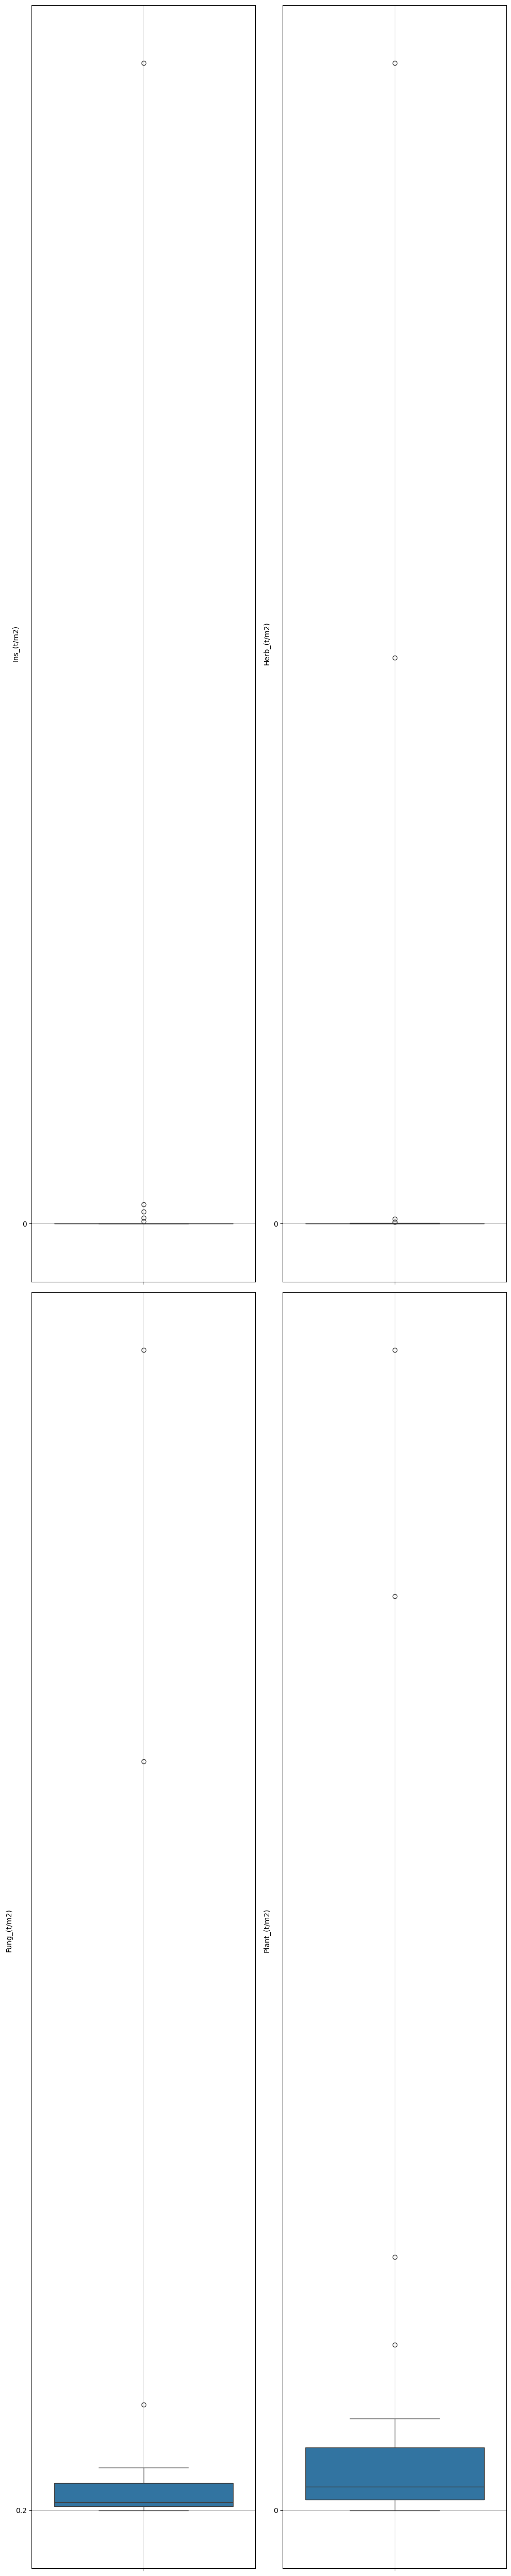

In [7]:
plt.figure(figsize=(10, 50))
for idx, col in enumerate(parea_labels):
    plt.subplot(2, 2, idx + 1)
    sns.boxplot(y=col, data=var_join)
    min_val = var_join[col].min()
    max_val = var_join[col].max()
    step = 10000 if (max_val - min_val) > 50000 else 5000
    plt.yticks(np.arange(min_val, max_val + 1, step))
    plt.grid(True)
plt.tight_layout()
plt.show()

## Some countries have way too high std, we remove them

### This was a more complex task so we modified LLM-generated code for both cleanup algorithms

In [8]:
outliers = {}

for col in parea_labels:
    q1 = var_join[col].quantile(0.25)
    q3 = var_join[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter rows where the value is outside the boxplot range
    mask = (var_join[col] < lower_bound) | (var_join[col] > upper_bound)
    outlier_countries = var_join.loc[mask].index.unique()
    outliers[col] = outlier_countries
all_outlier_countries = set()
for countries in outliers.values():
    all_outlier_countries.update(countries)
all_outlier_countries

{'Cyprus',
 'Denmark',
 'Greece',
 'Ireland',
 'Malta',
 'Netherlands (Kingdom of the)',
 'Poland',
 'Portugal'}

In [9]:
pest_cleaned = data_pesticide[~data_pesticide["Area"].isin(all_outlier_countries)]
pest_cleaned.head()

,Area,Year,Insecticides,Herbicides (t),Fung & Bact (t),Plant Growth Regulators (t),Area harvested (ha),Production (t),Yield (kg/ha),Ins_(t/m2),Herb_(t/m2),Fung_(t/m2),Plant_(t/m2),Overall_Pesticides/ha
0,Austria,1961,NaN,NaN,NaN,NaN,275822.0,711673.0,2580.2,NaN,NaN,NaN,NaN,NaN
1,Austria,1962,NaN,NaN,NaN,NaN,270351.0,706206.0,2612.2,NaN,NaN,NaN,NaN,NaN
2,Austria,1963,NaN,NaN,NaN,NaN,274722.0,689528.0,2509.9,NaN,NaN,NaN,NaN,NaN
3,Austria,1964,NaN,NaN,NaN,NaN,282967.0,750534.0,2652.4,NaN,NaN,NaN,NaN,NaN
4,Austria,1965,NaN,NaN,NaN,NaN,275654.0,660712.0,2396.9,NaN,NaN,NaN,NaN,NaN


In [10]:
mean_join = pest_cleaned.groupby('Area')[["Ins_(t/m2)", 'Herb_(t/m2)', 'Fung_(t/m2)', 'Plant_(t/m2)']].mean()
mean_join

,Ins_(t/m2),Herb_(t/m2),Fung_(t/m2),Plant_(t/m2)
Area,,,,
Austria,0.554177,0.663389,3.630991,1.411574
Belgium,0.484278,0.585241,7.314452,14.687212
Belgium-Luxembourg,0.334773,0.143389,4.923573,15.818577
Bulgaria,0.877187,0.599445,2.447734,0.099005
Croatia,0.403983,0.811471,2.741519,2.973673
Czechia,0.274947,0.233956,3.257111,6.671320
Estonia,0.163196,0.283437,1.905190,3.639290
Finland,0.152698,0.308498,2.370718,4.100706
France,0.521265,0.292457,4.062053,6.084989


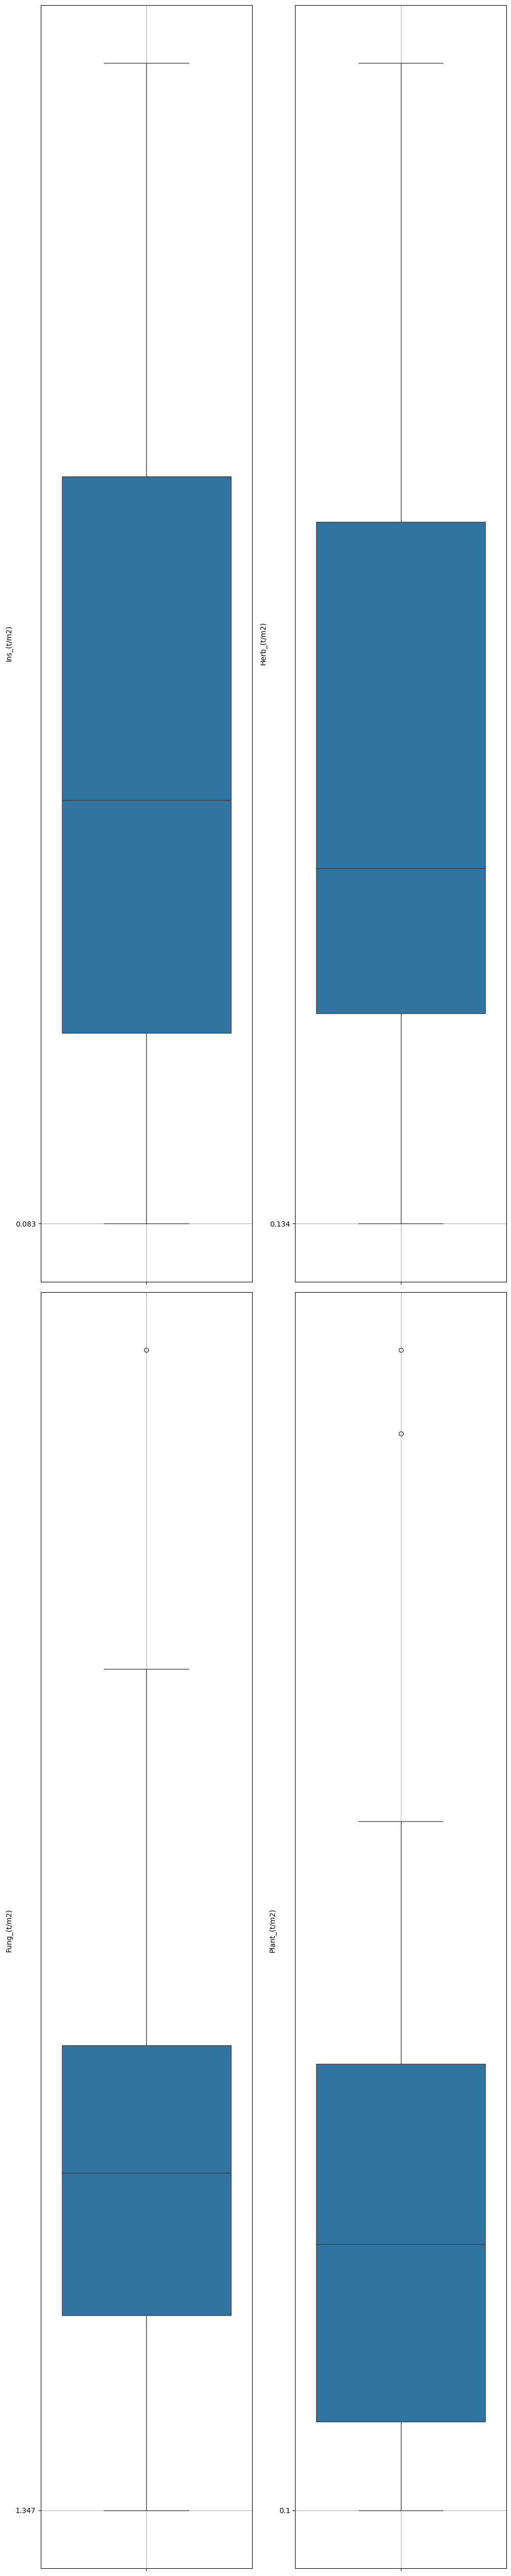

In [11]:
plt.figure(figsize=(10, 50))
for idx, col in enumerate(parea_labels):
    plt.subplot(2, 2, idx + 1)
    sns.boxplot(y=col, data=mean_join)
    min_val = mean_join[col].min()
    max_val = mean_join[col].max()
    step = 10000 if (max_val - min_val) > 50000 else 5000
    plt.yticks(np.arange(min_val, max_val + 1, step))
    plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
outliers2 = {}

for col in parea_labels:
    q1 = mean_join[col].quantile(0.25)
    q3 = mean_join[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter rows where the value is outside the boxplot range
    mask = (mean_join[col] < lower_bound) | (mean_join[col] > upper_bound)
    outlier_countries2 = mean_join.loc[mask].index.unique()
    outliers2[col] = outlier_countries2
all_outlier_countries2 = set()
for countries in outliers2.values():
    all_outlier_countries2.update(countries)
all_outlier_countries2

{'Belgium', 'Belgium-Luxembourg'}

In [13]:
pest_cleaned = pest_cleaned[~pest_cleaned["Area"].isin(all_outlier_countries2)].drop(columns=["Yield (kg/ha)","Area harvested (ha)","Production (t)"])
pest_cleaned

,Area,Year,Insecticides,Herbicides (t),Fung & Bact (t),Plant Growth Regulators (t),Ins_(t/m2),Herb_(t/m2),Fung_(t/m2),Plant_(t/m2),Overall_Pesticides/ha
0,Austria,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1438,Sweden,2019,13.11,NaN,49.13,34.22,0.279239,NaN,1.046455,0.728876,NaN
1439,Sweden,2020,9.96,6.02,72.76,63.76,0.221742,0.134025,1.619877,1.419507,0.000340
1440,Sweden,2021,9.30,5.91,83.62,69.94,0.194102,0.123349,1.745247,1.459729,0.000352
1441,Sweden,2022,NaN,6.62,92.83,71.00,NaN,0.143424,2.011179,1.538228,NaN


## The data turned out to have unrealistic spikes, so we need to remove them

# Temperature data

In [14]:
data_temperature = pd.read_csv('/work/FAOSTAT_Temperature_EU.csv')

data_temperature = data_temperature.pivot(index=["Area", "Year"], columns=["Months","Element"], values="Value").reset_index()
#data_temperature[(data_temperature["Area"] == "France") & (data_temperature["Year"] == 2017)]

#This allow us to remove the multiinder 
data_temperature.columns =data_temperature.columns = ['_'.join(filter(None, col)).strip() for col in data_temperature.columns]
data_temperature.columns

#We rename the columns and also add the unit to not be lost in our data and units
data_temperature = data_temperature.rename(columns={"January_Temperature change": "January °C", "January_Standard Deviation": "January Strd °C",
                        "February_Temperature change": "February °C", "February_Standard Deviation": "February Strd °C",
                        "March_Temperature change": "March °C", "March_Standard Deviation": "March Strd °C",
                        "April_Temperature change": "April °C", "April_Standard Deviation": "April Strd °C",
                        "May_Temperature change": "May °C", "May_Standard Deviation": "May Strd °C",
                        "June_Temperature change": "June °C", "June_Standard Deviation": "June Strd °C",
                        "July_Temperature change": "July °C", "July_Standard Deviation": "July Strd °C",
                        "August_Temperature change": "August °C", "August_Standard Deviation": "August Strd °C",
                        "September_Temperature change": "September °C", "September_Standard Deviation": "September Strd °C",
                        "October_Temperature change": "October °C", "October_Standard Deviation": "October Strd °C",
                        "November_Temperature change": "November °C", "November_Standard Deviation": "November Strd °C",
                        "December_Temperature change": "December °C", "December_Standard Deviation": "December Strd °C",
                        "Dec–Jan–Feb_Temperature change": "Winter °C", "Dec–Jan–Feb_Standard Deviation": "Winter Strd °C",
                        "Mar–Apr–May_Temperature change":"Spring °C", "Mar–Apr–May_Standard Deviation":"Spring Strd °C",
                        "Jun–Jul–Aug_Temperature change":"Summer °C", "Jun–Jul–Aug_Standard Deviation":"Summer Strd °C",
                        "Sep–Oct–Nov_Temperature change":"Autumn °C", "Sep–Oct–Nov_Standard Deviation":"Autumn Strd °C"})
                        
data_temperature

,Area,Year,January °C,January Strd °C,February °C,February Strd °C,March °C,March Strd °C,April °C,April Strd °C,...,Winter °C,Winter Strd °C,Spring °C,Spring Strd °C,Summer °C,Summer Strd °C,Autumn °C,Autumn Strd °C,Meteorological year_Temperature change,Meteorological year_Standard Deviation
0,Austria,1961,-0.803,1.944,2.898,2.922,2.718,2.054,3.568,1.497,...,1.075,1.522,1.701,0.863,-0.095,0.552,1.442,0.839,1.031,0.530
1,Austria,1962,1.345,1.944,-0.674,2.922,-3.128,2.054,0.715,1.497,...,-0.167,1.522,-1.335,0.863,-0.509,0.552,-0.491,0.839,-0.626,0.530
2,Austria,1963,-5.075,1.944,-5.309,2.922,-1.554,2.054,1.311,1.497,...,-4.835,1.522,-0.099,0.863,0.632,0.552,1.386,0.839,-0.729,0.530
3,Austria,1964,-3.156,1.944,0.048,2.922,-2.140,2.054,1.342,1.497,...,-2.317,1.522,0.019,0.863,0.704,0.552,0.131,0.839,-0.366,0.530
4,Austria,1965,1.430,1.944,-3.709,2.922,-0.666,2.054,-1.037,1.497,...,-0.991,1.522,-0.970,0.863,-0.738,0.552,-0.828,0.839,-0.882,0.530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Sweden,2020,7.414,2.688,5.785,3.197,3.430,2.484,1.992,1.277,...,5.751,2.323,1.648,1.148,1.495,0.788,2.845,1.194,2.935,0.852
1466,Sweden,2021,0.418,2.688,1.152,3.197,3.576,2.484,1.165,1.277,...,2.258,2.323,1.729,1.148,2.023,0.788,1.341,1.194,1.838,0.852
1467,Sweden,2022,4.112,2.688,3.780,3.197,4.052,2.484,1.026,1.277,...,2.405,2.323,2.178,1.148,1.845,0.788,2.048,1.194,2.119,0.852
1468,Sweden,2023,4.663,2.688,4.981,3.197,-0.244,2.484,1.587,1.277,...,3.059,2.323,1.005,1.148,1.585,0.788,0.203,1.194,1.463,0.852


# Rain

In [15]:
data_rain = pd.read_csv('/work/precipitation_yearly.csv')
data_rain.drop('Unnamed: 0',axis=1,inplace=True)
data_rain.rename(columns={'Value':'Rain (mm/year)'},inplace=True)
data_rain.tail()
mapping = {
    "Czech Republic": "Czechia",
    "Belgium-Luxembourg": "Belgium",
    "Netherlands":"Netherlands (Kingdom of the)"
    # Tu peux en ajouter d'autres ici
}
data_rain = data_rain.replace({"Area": mapping})
print(data_rain.Area.unique())

['Austria' 'Belgium' 'Bulgaria' 'Cyprus' 'Czechia' 'Germany' 'Denmark'
 'Estonia' 'Greece' 'Spain' 'Finland' 'France' 'Croatia' 'Hungary'
 'Ireland' 'Italy' 'Lithuania' 'Luxembourg' 'Latvia' 'Malta'
 'Netherlands (Kingdom of the)' 'Poland' 'Portugal' 'Romania' 'Sweden'
 'Slovenia' 'Slovakia']


# temperature expectation

In [16]:
import json
import pandas as pd

# --- Chargement du fichier JSON ---
with open("countries.json", "r") as f:
    raw = json.load(f)

data = raw["data"]

# --- Dictionnaire de mapping ISO3 → noms ---
country_map = {
    "AUT": "Austria",
    "BEL": "Belgium",
    "BLX": "Belgium-Luxembourg",   # à adapter selon ton JSON
    "BGR": "Bulgaria",
    "HRV": "Croatia",
    "CYP": "Cyprus",
    "CZE": "Czechia",              # ou "Czech Republic"
    "DNK": "Denmark",
    "EST": "Estonia",
    "FIN": "Finland",
    "FRA": "France",
    "DEU": "Germany",
    "GRC": "Greece",
    "HUN": "Hungary",
    "IRL": "Ireland",
    "ITA": "Italy",
    "LVA": "Latvia",
    "LTU": "Lithuania",
    "LUX": "Luxembourg",
    "MLT": "Malta",
    "NLD": "Netherlands (Kingdom of the)",
    "POL": "Poland",
    "PRT": "Portugal",
    "ROU": "Romania",
    "SVK": "Slovakia",
    "SVN": "Slovenia",
    "ESP": "Spain",
    "SWE": "Sweden"
    # ajoute d'autres codes si présents dans ton fichier
}

# --- Transformation en DataFrame ---
records = []
for iso3, temps in data.items():
    for ym, value in temps.items():
        year, month = ym.split("-")
        records.append({
            "Area": country_map.get(iso3, iso3),  # nom complet si dispo
            "Year": int(year),
            "Month": int(month),
            "Temp": value
        })

df = pd.DataFrame(records)

# --- Mapper mois → saisons ---
season_map = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Autumn", 10: "Autumn", 11: "Autumn"
}
df["Season"] = df["Month"].map(season_map)

# --- Moyenne par pays / année / saison ---
df_season = (
    df.groupby(["Area", "Year", "Season"])["Temp"]
      .mean()
      .reset_index()
)

# --- Pivot saison en colonnes ---
temp_prev = df_season.pivot_table(
    index=["Area", "Year"],
    columns="Season",
    values="Temp"
).reset_index()

# --- Renommer colonnes ---
temp_prev = temp_prev.rename(columns={
    "Spring": "Spring °C",
    "Summer": "Summer °C",
    "Autumn": "Autumn °C",
    "Winter": "Winter °C"
})

temp_prev


Season,Area,Year,Autumn °C,Spring °C,Summer °C,Winter °C
0,Austria,2015,8.06,6.55,16.10,-1.67
1,Austria,2016,7.73,6.50,16.24,-1.98
2,Austria,2017,7.64,6.71,16.50,-2.14
3,Austria,2018,7.74,6.75,16.14,-2.10
4,Austria,2019,7.86,6.55,16.39,-1.92
...,...,...,...,...,...,...
2403,Sweden,2096,6.58,4.60,16.29,-3.04
2404,Sweden,2097,6.87,4.89,16.31,-3.26
2405,Sweden,2098,7.28,4.74,16.19,-3.39
2406,Sweden,2099,7.13,4.98,16.00,-2.69


# Merge

In [32]:
# Merging the dataframes again

df = pd.merge(data_wheat_production, data_fertilizer, on=["Area", "Year"], how='outer')

df = pd.merge(df, data_temperature , on=["Area", "Year"], how='outer')
df = pd.merge(df, pest_cleaned , on=["Area", "Year"], how='outer')

df = pd.merge(df, data_rain , on=["Area", "Year"], how='outer')

#df = pd.merge(df, temp_prev , on=["Area", "Year"], how='left')

df.to_csv('dataset.csv', index=False)
# Colonnes à remplacer intégralement
cols_to_replace = ["Spring °C", "Summer °C", "Autumn °C", "Winter °C"]

# Préparer les index alignés
df.set_index(["Area", "Year"], inplace=True)
temp_prev.set_index(["Area", "Year"], inplace=True)

# Mettre à jour uniquement les colonnes choisies
df.update(temp_prev[cols_to_replace])

# Remettre l'index à plat
df.reset_index(inplace=True)
temp_prev.reset_index(inplace=True)

df.to_csv('dataset_prev.csv', index=False)
df

,Area,Year,Area harvested (ha),Production (t),Yield (kg/ha),Agri_use (t)_N,Use/cropland(kg/ha)_N,Agri_use (t)_P2O5,Use/cropland(kg/ha)_P2O5,Agri_use (t)_K2O,...,Insecticides,Herbicides (t),Fung & Bact (t),Plant Growth Regulators (t),Ins_(t/m2),Herb_(t/m2),Fung_(t/m2),Plant_(t/m2),Overall_Pesticides/ha,Rain (mm/year)
0,Austria,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.029919
1,Austria,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.064647
2,Austria,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380021
3,Austria,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.032555
4,Austria,1955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.283521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107,Sweden,2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.901382
4108,Sweden,2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.814753
4109,Sweden,2098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.958546
4110,Sweden,2099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.945495


# writing the CSV file